## Funciones PageRank

Funciones principales del algoritmo PageRank que obtienen la matriz de google y aplican el método de las potencias para obtener el autovector asociado al autovalor maximal

In [53]:
import numpy as np
from numpy.linalg import norm


def get_google_matrix(_adj_mat, q):
  adj_mat = np.array(_adj_mat)
  n = len(adj_mat[0])
  H = np.ones((n, n), dtype = np.float64)/ n
  M  = np.zeros((n, n), dtype = np.float64)
  for j in range(n):
    sumj = np.sum(adj_mat[:, j])
    if sumj == 0:
      M[:, j] = 1/n
    else:
      M[:, j] = adj_mat[:, j] / sumj
  return q * M + (1 - q) * H

def power_method(G_mat, eps):
  n = len(G_mat[0])
  x_prev = np.ones((n, 1), dtype = np.float64) / n
  x_curr = G_mat @ x_prev
  iter = 0
  while norm(x_curr - x_prev, 1) > eps:
    x_prev, x_curr, iter = x_curr, G_mat @ x_curr, iter +1
  return x_curr, iter


def PageRank(adj_mat,q,eps):
  G = get_google_matrix(adj_mat, q)
  vp, num_iters = power_method(G, eps)
  return G, vp, num_iters



## Ejemplo basico

Instalar librería necesaria

In [54]:
#!pip install networkx matplotlib


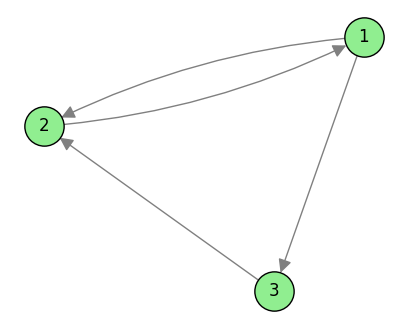

In [55]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear grafo de ejemplo
G = nx.DiGraph()
G.add_edge(1, 2)
G.add_edge(2, 1)
G.add_edge(1, 3)
G.add_edge(3, 2)

pos = nx.spring_layout(G, k=5, iterations=50, seed=1)

plt.figure(figsize=(5, 4))

# Funcion para dibujar los dobles arcos separados
def draw_parallel_edges(G, pos, **edge_draw_kwargs):
    for u, v, d in G.edges(data=True):
        rad = 0.1
        if G.has_edge(v, u):
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], connectionstyle=f'arc3,rad={rad}', **edge_draw_kwargs)
            rad = -rad
        else:
            nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], **edge_draw_kwargs)

# Dibujar Ejes
draw_parallel_edges(G, pos, arrowstyle='-|>', arrowsize=20, edge_color='gray', node_size=800)

# Dibujar Nodos
nx.draw_networkx_nodes(G, pos, node_color='lightgreen', node_size=800, edgecolors='k')
nx.draw_networkx_labels(G, pos, font_size=12)

plt.axis('off')
plt.show()


In [56]:

'''
Ejemplo:
Grafo dirigido:
(1) <-> (2)
 \       ^
   v   /
    (3)

Matriz de adyacencia:
0 1 0
1 0 1
1 0 0

Intuitivamente, el nodo dos tiene dos aristas apuntandole mientras que
los otros dos solo tienen una. Por lo tanto deberá ser más importante el nodo 2
que el 1 y el 3. El nodo uno es apuntado por el nodo 2, mientras que el nodo 3
es apuntado por el nodo 1, y como el nodo 2 es más importante que el 1, el nodo
 1 es más importante que el nodo 3

Matriz de Google
0.05  0.9   0.05
0.475 0.05  0.9
0.475 0.05  0.05

Autovector del autovalor 1:
[343/190, 37/20, 1]
Escalando para que la suma del vector sea 1:
[686/1769,703/1769,380/1769] =
= [0.3877897,0.3973997, 0.2148106]

El resultado del método de la potencia es prácticamente el autovector, y vemos
que cumple el orden de importancia que habíamos intuido
'''

adj_mat = [[0,1,0],[1,0,1],[1,0,0]]
q = 0.85
eps = 0.00000001

G, vp, num_iters = PageRank(adj_mat, q, eps)

print("G = \n",G)
print("Vector de perrón:\n",vp)
print("Obtenido en ", num_iters, " iteraciones")

G = 
 [[0.05  0.9   0.05 ]
 [0.475 0.05  0.9  ]
 [0.475 0.05  0.05 ]]
Vector de perrón:
 [[0.38778971]
 [0.39739966]
 [0.21481063]]
Obtenido en  35  iteraciones


## Experimento Páginas Web Facultad de Matemáticas UCM

Cargar matriz de adyacencia

In [57]:
import pandas as pd

# Leer la matriz de adyacencia
df = pd.read_csv('adjacency_matrix.csv', index_col=0)
df


,https://matematicas.ucm.es/login_sso/,https://www.ucm.es/mathematics,https://www.ucm.es/,https://matematicas.ucm.es/,https://matematicas.ucm.es/facultad,https://matematicas.ucm.es/gobierno,https://matematicas.ucm.es/departamentos_1,https://matematicas.ucm.es/sgic,https://matematicas.ucm.es/profesorado,https://matematicas.ucm.es/encuestas,...,https://www.ucm.es/maui,https://quimicas.ucm.es/intercambio-y-movilidad,https://quimicas.ucm.es/tassep,https://www.ucm.es/file/convocatoria-tassep23-24.v6?ver,http://www.mat.ucm.es/~decanato/12Erasmus/PresentacionTASSEP_2023.pdf,https://www.ucm.es/file/ccie24?ver,https://www.ucm.es/seguro-escolar-1/,https://matematicas.ucm.es/file/solicitud-de-matrícula-eras-in,https://matematicas.ucm.es/formulario-de-matriculacion-movilidad-incoming,mailto:erasmus1@pas.ucm.es
https://matematicas.ucm.es/login_sso/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://www.ucm.es/mathematics,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://www.ucm.es/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://matematicas.ucm.es/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://matematicas.ucm.es/facultad,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://www.ucm.es/file/ccie24?ver,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://www.ucm.es/seguro-escolar-1/,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://matematicas.ucm.es/file/solicitud-de-matrícula-eras-in,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
https://matematicas.ucm.es/formulario-de-matriculacion-movilidad-incoming,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Convertir el DataFrame a una matriz
adj_mat = df.values.tolist()

# Extraer las URLs del índice del DataFrame
urls = df.index.tolist()
print(len(adj_mat), len(urls))
print(urls[0],np.sum(adj_mat[0]) )

4099 4099
https://matematicas.ucm.es/login_sso/ 0.0


Convertir DataFrame en matriz de adyacencia y vector de direcciones web

In [59]:
# Convertir el DataFrame a una matriz
adj_mat = df.values.tolist()

# Extraer las URLs del índice del DataFrame
urls = df.index.tolist()

print("Primeras 5 direcciones:")
print(urls[:5])

Primeras 5 direcciones:
['https://matematicas.ucm.es/login_sso/', 'https://www.ucm.es/mathematics', 'https://www.ucm.es/', 'https://matematicas.ucm.es/', 'https://matematicas.ucm.es/facultad']


Trasponer la matriz para tener las referencias entrantes y salientes como se van a tratar en el algoritmo PageRank

In [60]:
# Convertir la lista de listas a un array de NumPy
adj_mat_np = np.array(adj_mat)

# Obtener la matriz traspuesta
adj_mat_transpose = adj_mat_np.T

# Convertir la matriz traspuesta a una lista de listas
adj_mat_transpose_list = adj_mat_transpose.tolist()

In [61]:
q = 0.85
eps = 0.00000001
G, vp, num_iters = PageRank(adj_mat_transpose_list, q, eps)
print("G = \n",G)
print("Vector de perrón:\n",vp)
print("Obtenido en ", num_iters, " iteraciones")

G = 
 [[0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]
 [0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]
 [0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]
 ...
 [0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]
 [0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]
 [0.00024396 0.00024396 0.00024396 ... 0.00024396 0.00024396 0.00024396]]
Vector de perrón:
 [[0.00338387]
 [0.00338387]
 [0.00338387]
 ...
 [0.00018711]
 [0.00018985]
 [0.00018711]]
Obtenido en  20  iteraciones


### Páginas web más relevantes

Ordenar el vector de improtancias para obtener la clasificación de las direcciones y mostrar las webs más importantes

In [62]:
# Contar el número de referencias entrantes para cada URL (suma de cada columna)
incoming_references = np.sum(adj_mat_transpose, axis=1)

# Asociar cada URL con su número de referencias entrantes y valor de importancia
url_info = list(zip(urls, incoming_references, vp))

# Ordenar las URLs por valor de importancia en orden descendente
url_info_sorted = sorted(url_info, key=lambda x: x[2], reverse=True)

# Obtener las URLs con mayor valor de importancia
top_urls_ref_imp = url_info_sorted[:100]

# Imprimir las URLs más importantes con sus valores de importancia y referencias entrantes
print("Top URLs con más importancia y sus referencias entrantes:")
cont = 1
for url, references, importance in top_urls_ref_imp:
    print(f"{cont} URL: {url}, Importancia: {importance}, Referencias: {references}")
    cont += 1

Top URLs con más importancia y sus referencias entrantes:
1 URL: https://matematicas.ucm.es/login_sso/, Importancia: [0.00338387], Referencias: 657.0
2 URL: https://www.ucm.es/mathematics, Importancia: [0.00338387], Referencias: 657.0
3 URL: https://www.ucm.es/, Importancia: [0.00338387], Referencias: 657.0
4 URL: https://matematicas.ucm.es/, Importancia: [0.00338387], Referencias: 657.0
5 URL: http://www.youtube.com/ucomplutensemadrid, Importancia: [0.00338387], Referencias: 657.0
6 URL: https://www.facebook.com/UniComplutense, Importancia: [0.00338387], Referencias: 657.0
7 URL: http://twitter.com/unicomplutense, Importancia: [0.00338387], Referencias: 657.0
8 URL: https://www.ucm.es/fundacion, Importancia: [0.00338387], Referencias: 657.0
9 URL: https://www.ucm.es/ucm-en-linea, Importancia: [0.00338387], Referencias: 657.0
10 URL: https://matematicas.ucm.es/buzones-de-sugerencias-y-quejas, Importancia: [0.00338387], Referencias: 657.0
11 URL: https://www.ucm.es/csim, Importancia: [0

### Páginas web menos relevantes

Mostrar las webs menos relevantes

In [71]:
# Asociar cada URL con su valor de importancia
url_importance = list(zip(urls, vp))

# Ordenar las URLs por valor de importancia en orden descendente
url_importance_sorted = sorted(url_importance, key=lambda x: x[1], reverse=True)

# Obtener las URLs con mayor valor de importancia
last_urls = url_importance_sorted[-100:]

# Imprimir las URLs más importantes con sus valores de importancia
cont = len(url_importance_sorted)
for url, importance in last_urls:
    print(f"{cont} URL: {url}, Importancia: {importance}")
    cont -= 1

4099 URL: https://www.ucm.es/data/cont/docs/3-2015-05-22-M040_2015_EST_Solicitud_Titulo_Doctor_v1.pdf, Importancia: [0.00018711]
4098 URL: mailto:erasmus@ucm.es, Importancia: [0.00018711]
4097 URL: mailto:spe@ucm.es, Importancia: [0.00018711]
4096 URL: https://www.youtube.com/watch?reload=9&v=8UamD28cSl8, Importancia: [0.00018711]
4095 URL: https://www.youtube.com/watch?v=yn9z3ncqVFY, Importancia: [0.00018711]
4094 URL: https://www.ucm.es/data/cont/docs/3-2018-06-21-SET%20nuevo73.pdf, Importancia: [0.00018711]
4093 URL: https://matematicas.ucm.es/estudios/grado-matematicas-acceso-informacion, Importancia: [0.00018711]
4092 URL: https://matematicas.ucm.es/estudios/grado-matematicas-plan-800570, Importancia: [0.00018711]
4091 URL: https://matematicas.ucm.es/estudios/grado-matematicas-plan-800571, Importancia: [0.00018711]
4090 URL: https://matematicas.ucm.es/estudios/grado-matematicas-plan-800574, Importancia: [0.00018711]
4089 URL: https://matematicas.ucm.es/estudios/grado-matematicas-p

### Páginas web con más referencias salientes

Las referencias son a paginas web que se encuentran dentro del conjunto de direcciones contempladas en este proyecto.

In [64]:

# Contar el número de referencias entrantes para cada URL (suma de cada columna)
out_references = np.sum(adj_mat_transpose, axis=0)

# Asociar cada URL con su número de referencias entrantes
url_references = list(zip(urls, out_references))

# Ordenar las URLs por número de referencias en orden descendente
url_references_sorted = sorted(url_references, key=lambda x: x[1], reverse=True)

# Obtener las URLs con más referencias entrantes
top_100_references = url_references_sorted[:100]

print("Top URLs con más referencias salientes:")
cont = 1
for url, references in top_100_references:
    print(f"{cont} URL: {url}, Referencias: {references}")
    cont += 1

Top URLs con más referencias salientes:
1 URL: https://matematicas.ucm.es/directorio/.?eid=9, Referencias: 346.0
2 URL: https://matematicas.ucm.es/directorio/?eid=9, Referencias: 346.0
3 URL: https://matematicas.ucm.es/estudios/master-formacionprofesorado-plan, Referencias: 222.0
4 URL: https://matematicas.ucm.es/estudios/2023-24/master-formacionprofesorado-plan, Referencias: 222.0
5 URL: https://matematicas.ucm.es/estudios/2023-24/grado-matematicasyfisica-plan, Referencias: 173.0
6 URL: https://matematicas.ucm.es/estudios/2024-25/grado-matematicasyfisica-plan, Referencias: 173.0
7 URL: https://matematicas.ucm.es/estudios/2023-24/grado-informaticaymatematicas-plan, Referencias: 165.0
8 URL: https://matematicas.ucm.es/estudios/2024-25/grado-informaticaymatematicas-plan, Referencias: 164.0
9 URL: https://matematicas.ucm.es/estudios/2023-24/grado-economiamatematicas-plan, Referencias: 142.0
10 URL: https://matematicas.ucm.es/estudios/2024-25/grado-economiamatematicas-plan, Referencias: 13

### Páginas web con más referencias entrantes

In [65]:

# Contar el número de referencias entrantes para cada URL (suma de cada columna)
incoming_references = np.sum(adj_mat_transpose, axis=1)

# Asociar cada URL con su número de referencias entrantes
url_references = list(zip(urls, incoming_references))

# Ordenar las URLs por número de referencias en orden descendente
url_references_sorted = sorted(url_references, key=lambda x: x[1], reverse=True)

# Obtener las URLs con más referencias entrantes
top_references_incoming = url_references_sorted[:100]

# Imprimir las URLs con más referencias entrantes
print("Top URLs con más referencias entrantes:")
cont = 1
for url, references in top_references_incoming:
    print(f"{cont} URL: {url}, Referencias: {references}")
    cont += 1

Top URLs con más referencias entrantes:
1 URL: https://matematicas.ucm.es/login_sso/, Referencias: 657.0
2 URL: https://www.ucm.es/mathematics, Referencias: 657.0
3 URL: https://www.ucm.es/, Referencias: 657.0
4 URL: https://matematicas.ucm.es/, Referencias: 657.0
5 URL: http://www.youtube.com/ucomplutensemadrid, Referencias: 657.0
6 URL: https://www.facebook.com/UniComplutense, Referencias: 657.0
7 URL: http://twitter.com/unicomplutense, Referencias: 657.0
8 URL: https://www.ucm.es/fundacion, Referencias: 657.0
9 URL: https://www.ucm.es/ucm-en-linea, Referencias: 657.0
10 URL: https://matematicas.ucm.es/buzones-de-sugerencias-y-quejas, Referencias: 657.0
11 URL: https://www.ucm.es/csim, Referencias: 657.0
12 URL: https://www.ucm.es/hrs4r, Referencias: 657.0
13 URL: http://www.campusmoncloa.es/, Referencias: 657.0
14 URL: https://una-europa.ucm.es/, Referencias: 657.0
15 URL: https://matematicas.ucm.es/contacto, Referencias: 657.0
16 URL: https://matematicas.ucm.es/aviso-legal, Referen

### Siguientes páginas web más relevantes

Se puede observar que hay bastantes páginas que aparecen en todas las otras páginas como botones auxiliares de atajo para acceder a estas páginas desde cualquier URL de la facultad de matemáticas, y por eso estas páginas son las más relevantes para el algoritmo. Si ignoramos estas páginas que tienen atajos en el resto podemos ver las siguientes páginas más relevantes:

In [66]:
# Contar el numero de referencias entrantes para cada URL (suma de cada columna)
incoming_references = np.sum(adj_mat_transpose, axis=1)

# Asociar cada URL con su numero de referencias entrantes y valor de importancia
url_info = list(zip(urls, incoming_references, vp))

# Ordenar las URLs por valor de importancia en orden descendente
url_info_sorted = sorted(url_info, key=lambda x: x[2], reverse=True)

# Imprimir las URLs más importantes con sus valores de importancia y referencias entrantes
print("Top URLs con más importancia y sus referencias entrantes:")
cont = 1
orden = 1
while orden <= 50:
    url, references, importance = url_info_sorted[cont]
    if(references < 450):
      print(f"{orden} URL: {url}, Importancia: {importance}, Referencias: {references}")
      orden += 1
    cont += 1

Top URLs con más importancia y sus referencias entrantes:
1 URL: https://matematicas.ucm.es/directorio/?eid=9, Importancia: [0.00084627], Referencias: 280.0
2 URL: https://matematicas.ucm.es/buscador, Importancia: [0.00084291], Referencias: 280.0
3 URL: http://matematicas.ucm.es/, Importancia: [0.00054931], Referencias: 172.0
4 URL: https://matematicas.ucm.es/directorio/.?eid=9, Importancia: [0.00035341], Referencias: 6.0
5 URL: https://matematicas.ucm.es/estudios/2023-24/grado, Importancia: [0.00034822], Referencias: 73.0
6 URL: https://matematicas.ucm.es/directorio/?eid=3205, Importancia: [0.00034762], Referencias: 70.0
7 URL: https://matematicas.ucm.es/matricula, Importancia: [0.00034638], Referencias: 7.0
8 URL: https://matematicas.ucm.es/directorio/?eid=3204, Importancia: [0.00032234], Referencias: 59.0
9 URL: https://matematicas.ucm.es/jornada-de-puertas-abiertas, Importancia: [0.00030022], Referencias: 3.0
10 URL: https://matematicas.ucm.es/semana-de-la-ciencia, Importancia: [0.

### Analizar la calidad de referencias

In [67]:
import numpy as np


# Inicializar la lista de referencias entrantes
incoming_references_list = [[] for _ in range(len(urls))]

# Rellenar la lista de referencias entrantes
for i in range(len(urls)):
    for j in range(len(urls)):
        if adj_mat_transpose[i, j] == 1:
            incoming_references_list[i].append(j)

# Contar el número de referencias entrantes para cada URL (suma de cada columna)
incoming_references = np.sum(adj_mat_transpose, axis=1)

# Asociar cada URL con su número de referencias entrantes, valor de importancia, y lista de referencias entrantes
url_info = list(zip(urls, incoming_references, vp, incoming_references_list))

# Ordenar las URLs por valor de importancia en orden descendente
url_info_sorted = sorted(url_info, key=lambda x: x[2], reverse=True)

Comapración entre las referencias de  https://matematicas.ucm.es/directorio/.?eid=9, que tiene más importoncia que https://matematicas.ucm.es/estudios/2023-24/grado pero menor número de referencias.

In [68]:
def get_referring_pages(target_url):
    if target_url in urls:
        target_index = urls.index(target_url)
        ref_indices = incoming_references_list[target_index]
        referring_info = [(urls[idx], incoming_references[idx], vp[idx]) for idx in ref_indices]
        return referring_info
    else:
        return []

Referencias de  https://matematicas.ucm.es/directorio/.?eid=9 con Importancia: [0.00035341] y 6 Referencias:

In [69]:
target_url = 'https://matematicas.ucm.es/directorio/.?eid=9'
referring_pages_info = get_referring_pages(target_url)
print(f"Páginas que refieren a {target_url} con Importancia: [0.00035341] y 6 Referencias:")
for ref_url, ref_references, ref_importance in referring_pages_info:
    print(f"URL: {ref_url}, Importancia: {ref_importance}, Referencias Entrantes: {ref_references}")

Páginas que refieren a https://matematicas.ucm.es/directorio/.?eid=9 con Importancia: [0.00035341] y 6 Referencias:
URL: https://matematicas.ucm.es/seccion-de-personal, Importancia: [0.0033513], Referencias Entrantes: 656.0
URL: https://matematicas.ucm.es/asuntos-economicos, Importancia: [0.0033513], Referencias Entrantes: 656.0
URL: https://matematicas.ucm.es/biblioteca-1, Importancia: [0.0033513], Referencias Entrantes: 656.0
URL: https://matematicas.ucm.es/cafeteria, Importancia: [0.0033513], Referencias Entrantes: 656.0
URL: https://matematicas.ucm.es/departamentos-centro, Importancia: [0.00025878], Referencias Entrantes: 2.0
URL: https://matematicas.ucm.es/laboratorio-y-aulas-de-informatica, Importancia: [0.00022539], Referencias Entrantes: 2.0


Referencias de   https://matematicas.ucm.es/estudios/2023-24/grado con Importancia: [0.00034822] y 73 Referencias:

In [70]:
target_url = 'https://matematicas.ucm.es/estudios/2023-24/grado'
referring_pages_info = get_referring_pages(target_url)
print(f"Páginas que refieren a {target_url} con Importancia: [0.00034822] y 73 Referencias:")
for ref_url, ref_references, ref_importance in referring_pages_info:
    print(f"URL: {ref_url}, Importancia: {ref_importance}, Referencias Entrantes: {ref_references}")

Páginas que refieren a https://matematicas.ucm.es/estudios/2023-24/grado con Importancia: [0.00034822] y 73 Referencias:
URL: https://matematicas.ucm.es/estudios/2023-24/grado-economiamatematicasycienciadedatos, Importancia: [0.00022554], Referencias Entrantes: 3.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-economiamatematicas, Importancia: [0.00022554], Referencias Entrantes: 3.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-economiamatematicas., Importancia: [0.00022554], Referencias Entrantes: 3.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-informaticaymatematicas, Importancia: [0.00022547], Referencias Entrantes: 3.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-ingenieriamatematica, Importancia: [0.00022781], Referencias Entrantes: 4.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-matematicas, Importancia: [0.00022785], Referencias Entrantes: 4.0
URL: https://matematicas.ucm.es/estudios/2023-24/grado-matematicasyfisica, Importancia

Se puede ver que el algoritmo también evalúa la calidad de las referencias y no solo la cantidad a la hora de clasificar las páginas web.